In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df = pd.read_csv('Walmart_Store_sales.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.shape

(6435, 8)

In [6]:
df2 = df.groupby('Store').Weekly_Sales.sum()
print(df2)

Store
1     2.224028e+08
2     2.753824e+08
3     5.758674e+07
4     2.995440e+08
5     4.547569e+07
6     2.237561e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.716177e+08
11    1.939628e+08
12    1.442872e+08
13    2.865177e+08
14    2.889999e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    3.013978e+08
21    1.081179e+08
22    1.470756e+08
23    1.987506e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.538559e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    1.668192e+08
33    3.716022e+07
34    1.382498e+08
35    1.315207e+08
36    5.341221e+07
37    7.420274e+07
38    5.515963e+07
39    2.074455e+08
40    1.378703e+08
41    1.813419e+08
42    7.956575e+07
43    9.056544e+07
44    4.329309e+07
45    1.123953e+08
Name: Weekly_Sales, dtype: float64


In [7]:
print('Store {} has max sales of {}'.format(df2.idxmax(), df2.max()))

Store 20 has max sales of 301397792.46


In [8]:
df3 = df.groupby('Store').Weekly_Sales.std()
print(df3)

Store
1     155980.767761
2     237683.694682
3      46319.631557
4     266201.442297
5      37737.965745
6     212525.855862
7     112585.469220
8     106280.829881
9      69028.666585
10    302262.062504
11    165833.887863
12    139166.871880
13    265506.995776
14    317569.949476
15    120538.652043
16     85769.680133
17    112162.936087
18    176641.510839
19    191722.638730
20    275900.562742
21    128752.812853
22    161251.350631
23    249788.038068
24    167745.677567
25    112976.788600
26    110431.288141
27    239930.135688
28    181758.967539
29     99120.136596
30     22809.665590
31    125855.942933
32    138017.252087
33     24132.927322
34    104630.164676
35    211243.457791
36     60725.173579
37     21837.461190
38     42768.169450
39    217466.454833
40    119002.112858
41    187907.162766
42     50262.925530
43     40598.413260
44     24762.832015
45    130168.526635
Name: Weekly_Sales, dtype: float64


In [9]:
print('Store {} has max std dev of {}'.format(df3.idxmax(), df3.max()))

Store 14 has max std dev of 317569.9494755081


In [10]:
cv = (df.groupby('Store').Weekly_Sales.std() / df.groupby('Store').Weekly_Sales.mean()) * 100

In [11]:
cv

Store
1     10.029212
2     12.342388
3     11.502141
4     12.708254
5     11.866844
6     13.582286
7     19.730469
8     11.695283
9     12.689547
10    15.913349
11    12.226183
12    13.792532
13    13.251363
14    15.713674
15    19.338399
16    16.518065
17    12.552067
18    16.284550
19    13.268012
20    13.090269
21    17.029239
22    15.678288
23    17.972115
24    12.363738
25    15.986040
26    11.011066
27    13.515544
28    13.732974
29    18.374247
30     5.200804
31     9.016105
32    11.831049
33     9.286835
34    10.822524
35    22.968111
36    16.257891
37     4.208412
38    11.087545
39    14.990779
40    12.342978
41    14.817711
42     9.033533
43     6.410363
44     8.179331
45    16.561273
Name: Weekly_Sales, dtype: float64

In [12]:
print('Store {} has max coefficient of mean to standard deviation of {}'.format(cv.idxmax(), cv.max()))

Store 35 has max coefficient of mean to standard deviation of 22.968111389976432


In [13]:
Q3Data = df[(pd.to_datetime(df['Date'], dayfirst=True, format='%d-%m-%Y') >= pd.to_datetime('01-07-2012', dayfirst=True, format='%d-%m-%Y')) & (pd.to_datetime(df['Date'],  dayfirst=True, format='%d-%m-%Y') <= pd.to_datetime('30-09-2012', dayfirst=True, format='%d-%m-%Y'))]


In [14]:
Q3Data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
126,1,06-07-2012,1769854.16,0,81.57,3.227,221.883779,6.908
127,1,13-07-2012,1527014.04,0,77.12,3.256,221.924158,6.908
128,1,20-07-2012,1497954.76,0,80.42,3.311,221.932727,6.908
129,1,27-07-2012,1439123.71,0,82.66,3.407,221.941295,6.908
130,1,03-08-2012,1631135.79,0,86.11,3.417,221.949864,6.908
...,...,...,...,...,...,...,...,...
6426,45,31-08-2012,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,07-09-2012,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,14-09-2012,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.856704,8.684


In [15]:
StoreGrowth = Q3Data.groupby('Store').Weekly_Sales.sum()

In [16]:
StoreGrowth

Store
1     20253947.78
2     24303354.86
3      5298005.47
4     27796792.46
5      4163790.99
6     20167312.24
7      8262787.39
8     11748952.70
9      7022149.56
10    23037258.76
11    17516081.44
12    12536324.37
13    26421259.30
14    21187560.65
15     7612081.03
16     7121541.64
17    12459453.05
18    13489765.27
19    18203554.85
20    26891526.98
21     9027599.32
22    12845139.71
23    18641489.15
24    17976377.72
25     9109081.84
26    13675691.91
27    22307711.41
28    16080704.97
29     6671234.14
30     5594701.86
31    17806714.45
32    15396528.95
33     3433620.36
34    12485995.94
35    11322421.12
36     3831691.64
37     6728068.24
38     5605482.38
39    20715116.23
40    12873195.37
41    18093844.01
42     7296759.34
43     8000572.16
44     4411251.16
45     9581268.38
Name: Weekly_Sales, dtype: float64

In [17]:
print('Store {} has max Q3 sales/growth of {}'.format(StoreGrowth.idxmax(), StoreGrowth.max()))

Store 4 has max Q3 sales/growth of 27796792.46


In [18]:
SupBowl = ['12-02-2010','11-02-2011','10-02-2012', '08-02-2013']
Labour = ['10-09-2010','09-09-2011','07-09-2012', '06-09-2013']
Thanks = ['26-11-2010','25-11-2011','23-11-2012', '29-11-2013']
Christmas = ['31-12-2010','30-12-2011','28-12-2012', '27-12-2013']

In [19]:
Sup_Sales = df.loc[df.Date.isin(SupBowl)]['Weekly_Sales'].mean().round(2)
Lab_Sales = df.loc[df.Date.isin(Labour)]['Weekly_Sales'].mean().round(2)
Thanks_Sales = df.loc[df.Date.isin(Thanks)]['Weekly_Sales'].mean().round(2)
Xmas_Sales = df.loc[df.Date.isin(Christmas)]['Weekly_Sales'].mean().round(2)

In [20]:
Sup_Sales, Lab_Sales, Thanks_Sales, Xmas_Sales

(1079127.99, 1042427.29, 1471273.43, 960833.11)

In [21]:
noHoliday = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean().round(2)

In [22]:
noHoliday

1041256.38

In [23]:
print('Sales are higher that non-holiday weeks during Super Bowl events, Labour day events and Thanksgiving but Christmas sales are less than non-holiday weeks.')

Sales are higher that non-holiday weeks during Super Bowl events, Labour day events and Thanksgiving but Christmas sales are less than non-holiday weeks.


In [24]:
df['Year'] = pd.DatetimeIndex(df["Date"]).year
df['Month'] = pd.DatetimeIndex(df["Date"]).month
df['Day'] = pd.DatetimeIndex(df["Date"]).day

Text(0.5, 1.0, 'Monthly Sales')

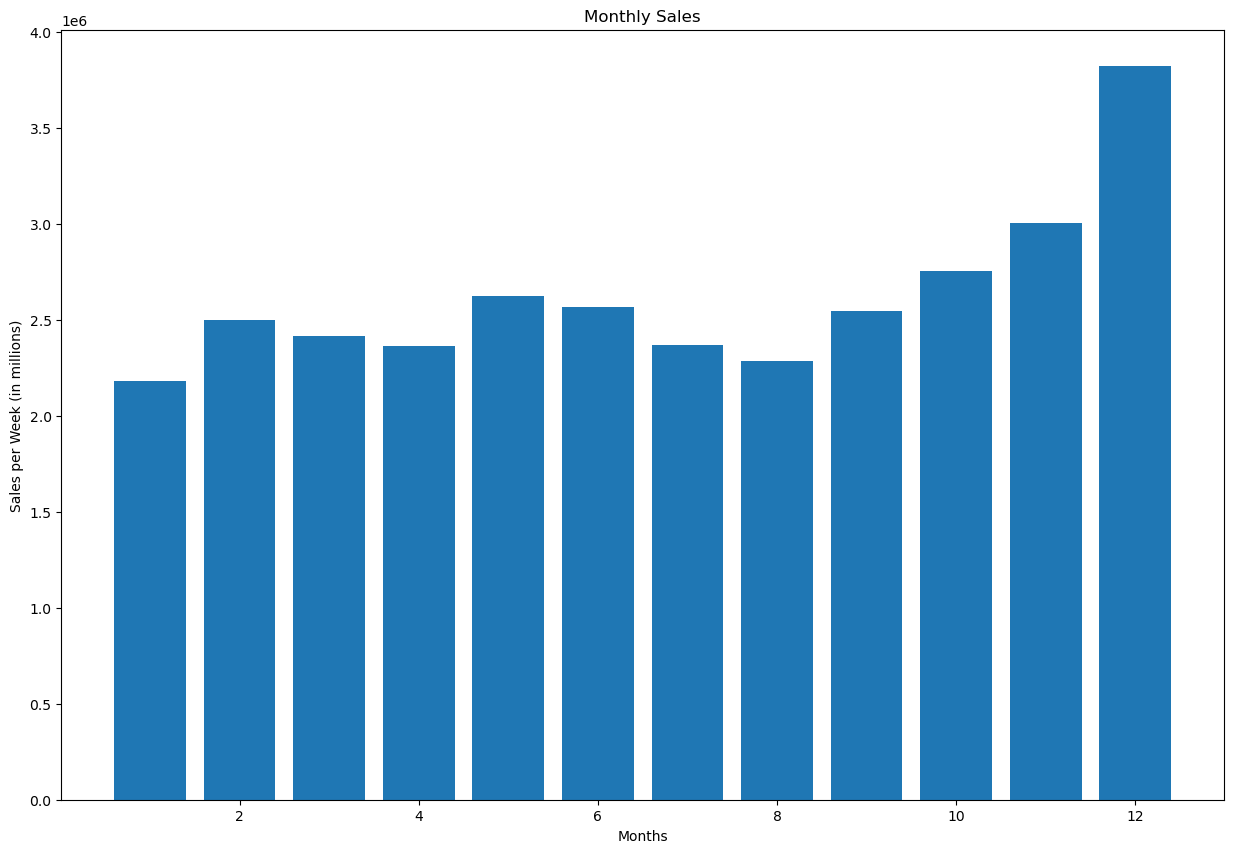

In [25]:
plt.figure(figsize=(15,10), dpi=100)
plt.bar(df['Month'], df['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Sales per Week (in millions)')
plt.title('Monthly Sales')

Text(0.5, 1.0, 'Yearly Sales')

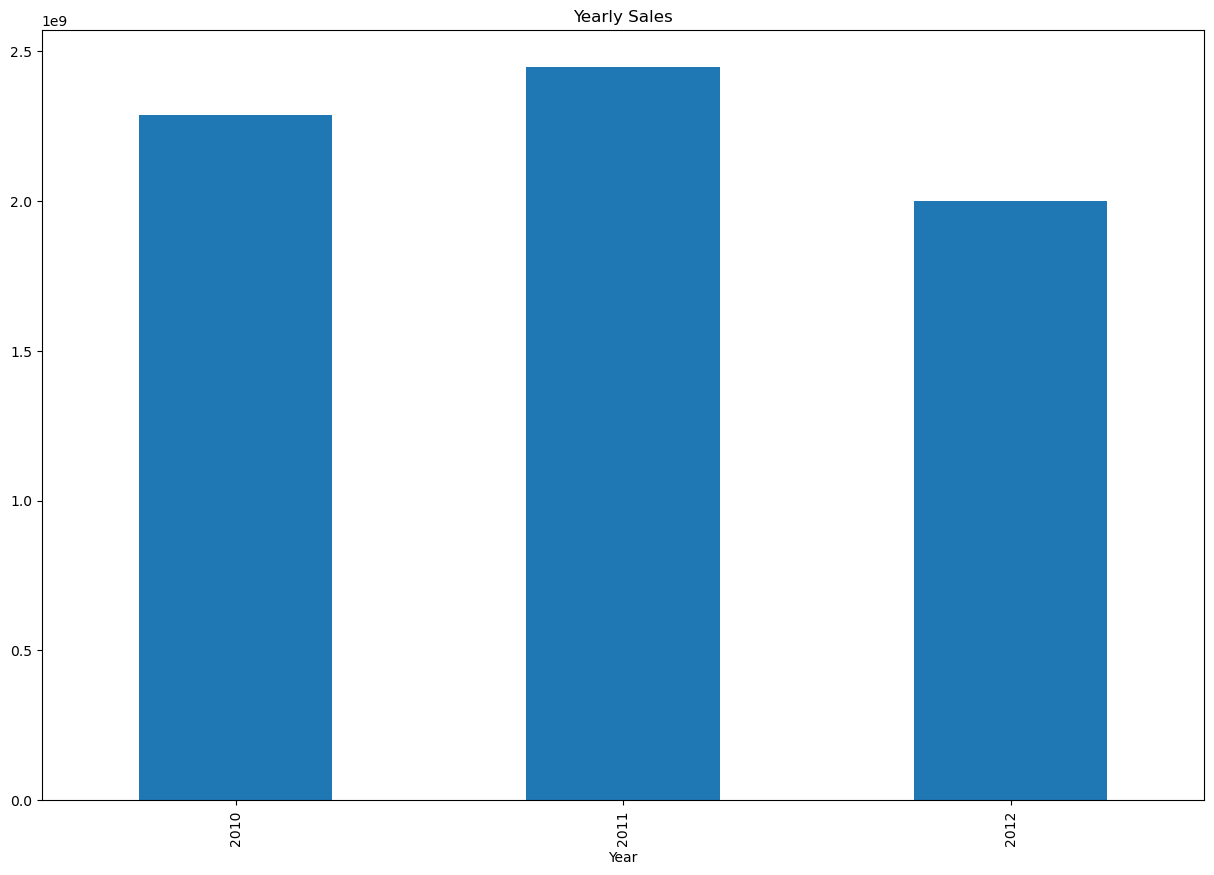

In [26]:
plt.figure(figsize=(15,10), dpi=100)
df.groupby('Year')['Weekly_Sales'].sum().plot(kind='bar',legend=False)
plt.title('Yearly Sales')

In [27]:
df['sem'] = np.where(df['Month'] <= 6 , 1, 2)

In [28]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,sem
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,2
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,1


Text(0.5, 1.0, 'Semester Sales')

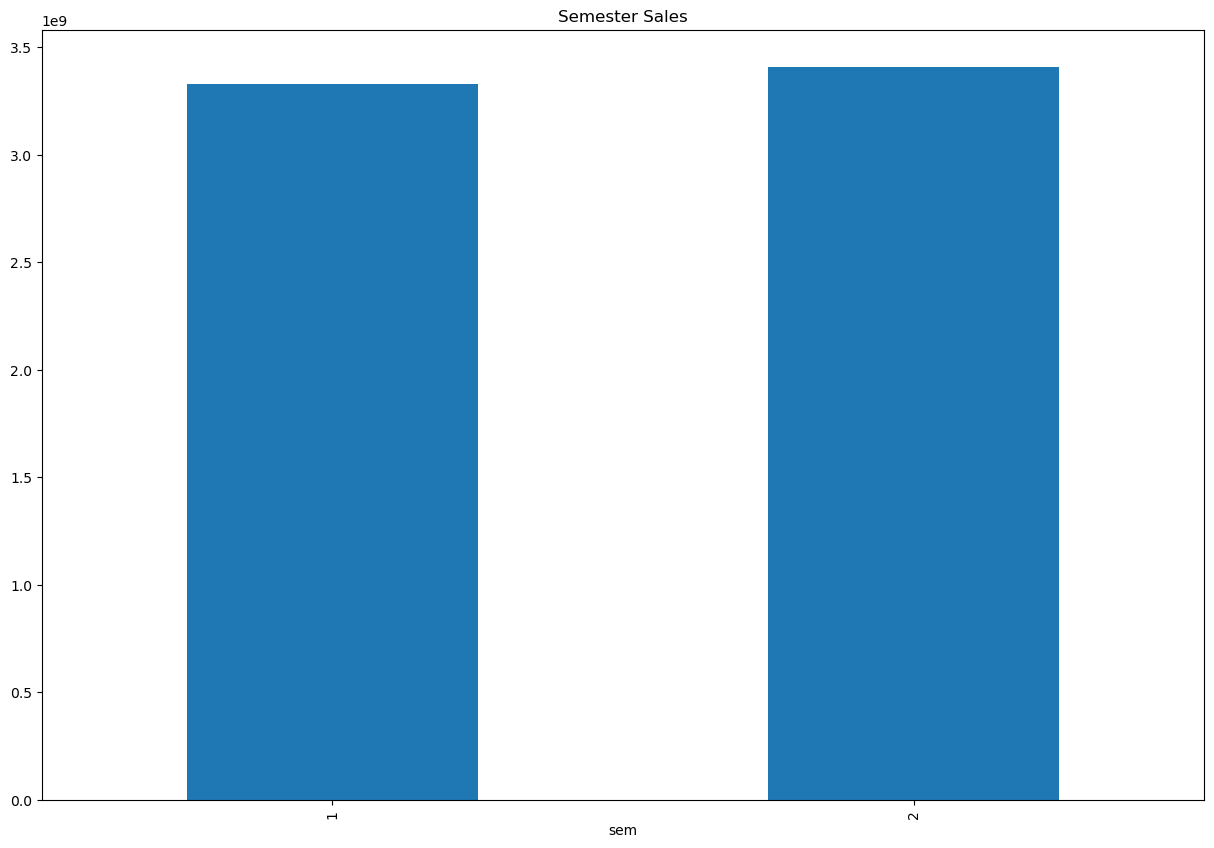

In [29]:
plt.figure(figsize=(15,10), dpi=100)
df.groupby('sem')['Weekly_Sales'].sum().plot(kind='bar',legend=False)
plt.title('Semester Sales')

In [54]:
x=df[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
y=df['Weekly_Sales']

In [55]:
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.25)

In [56]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Linear Regression:
 
Accuracy: 15.2150476622406
Mean Absolute Error: 427149.78071159543
Mean Squared Error: 269988452098.35388
Root Mean Squared Error: 519604.1301783059


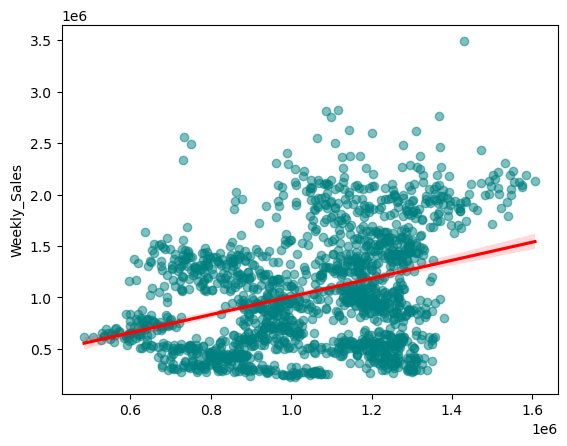

In [44]:
print('Linear Regression:')
print(' ')
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print('Accuracy:',reg.score(x_train, y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
sns.regplot(x=y_pred, y=y_test, scatter_kws = {"color": "teal", "alpha": 0.5},
            line_kws = {"color": "red"});

Random Forest Model:

Accuracy: 93.99368951689362
Mean Absolute Error: 621874.7846053196
Mean Squared Error: 609628617629.7146
Root Mean Squared Error: 780787.178192441


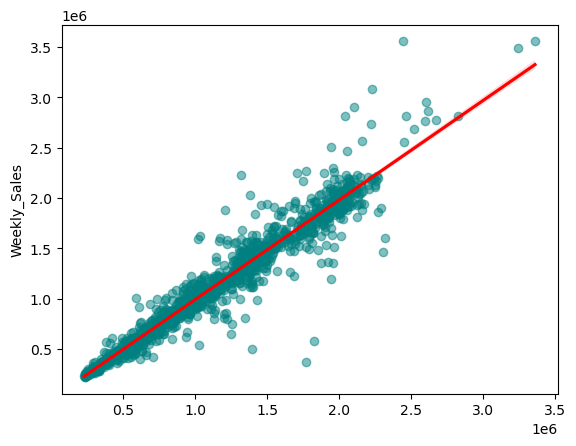

In [57]:
print('Random Forest Model:')
print()
rfr = RandomForestRegressor(n_estimators = 500,max_depth=15,n_jobs=5)        
rfr.fit(x_train,y_train)
y_pred2=rfr.predict(x_test)
print('Accuracy:',rfr.score(x_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.regplot(x=y_pred2, y=y_test, scatter_kws = {"color": "teal", "alpha": 0.5},
            line_kws = {"color": "red"});

In [60]:
df['Day'] = pd.to_datetime(df['Date'], format='%d-%m-%Y').dt.day_name()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,sem
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,Friday,1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,Friday,2
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Friday,1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Friday,1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,Friday,1


In [62]:
experiment_day_start=5
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['exp_day'] = (df['Date']-df['Date'].min()).dt.days + experiment_day_start
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,sem,exp_day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,Friday,1,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,Friday,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Friday,1,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Friday,1,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,Friday,1,33


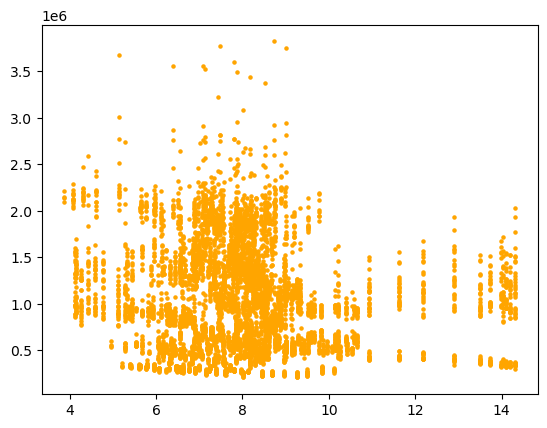

-0.10617608965795418


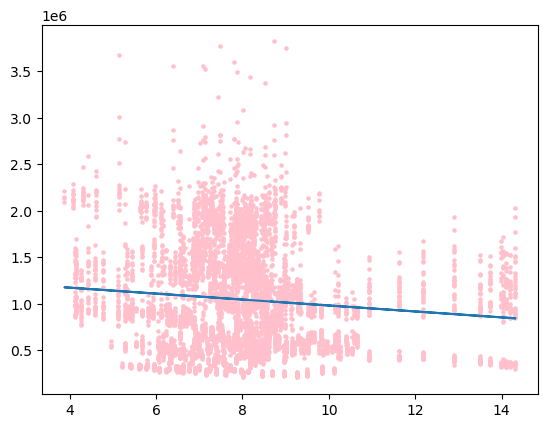

In [72]:
x = df['Unemployment']
y = df['Weekly_Sales']
plt.scatter(x, y,  c='orange', s=5)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y,  c='pink', s=5)
plt.plot(x, mymodel)
plt.show()

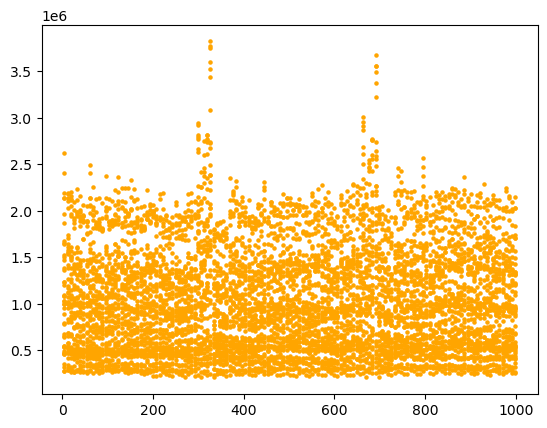

0.006949359783488994


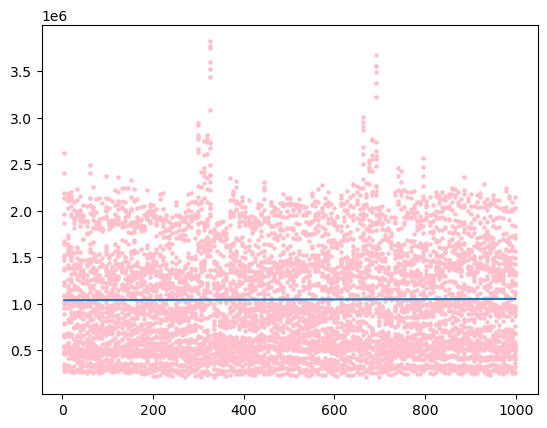

In [71]:
x = df['exp_day']
y = df['Weekly_Sales']
plt.scatter(x, y, c='orange', s=5)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y, c='pink', s=5)
plt.plot(x, mymodel)
plt.show()

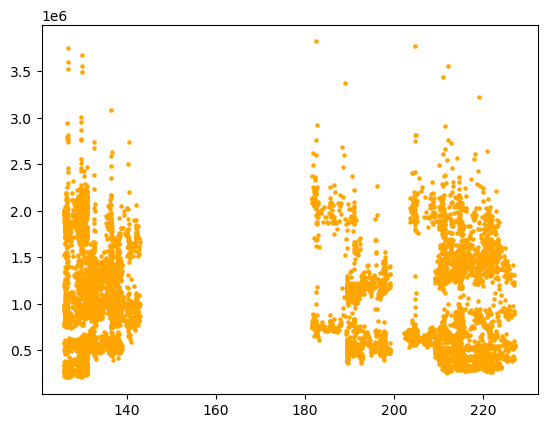

-0.07263416204017624


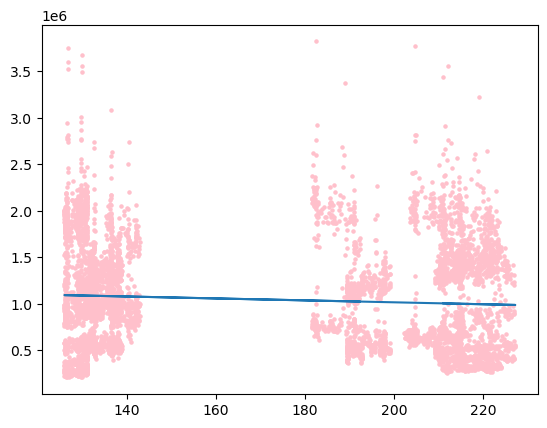

In [73]:
x = df['CPI']
y = df['Weekly_Sales']
plt.scatter(x, y, c='orange', s=5)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y, c='pink', s=5)
plt.plot(x, mymodel)
plt.show()

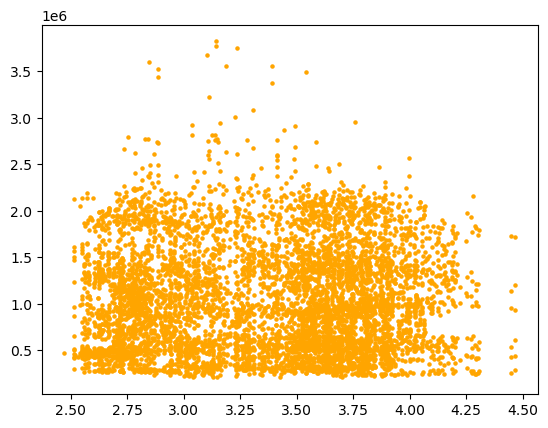

0.009463786314475134


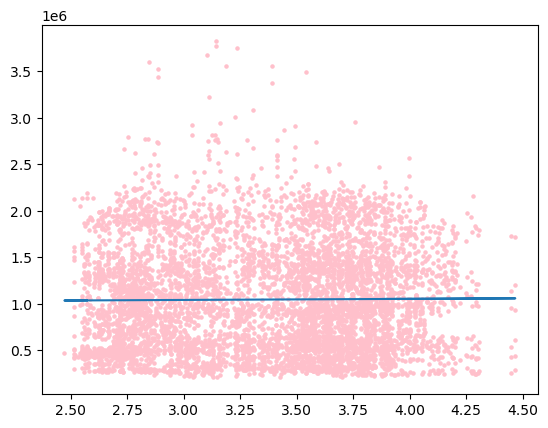

In [74]:
x = df['Fuel_Price']
y = df['Weekly_Sales']
plt.scatter(x, y, c='orange', s=5)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y, c='pink', s=5)
plt.plot(x, mymodel)
plt.show()

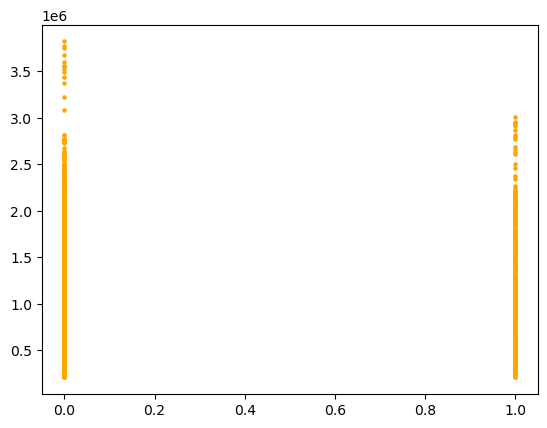

0.036890968010414596


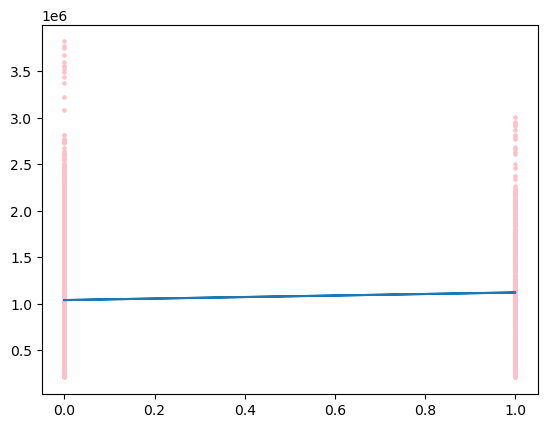

In [75]:
x = df['Holiday_Flag']
y = df['Weekly_Sales']
plt.scatter(x, y, c='orange', s=5)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y, c='pink', s=5)
plt.plot(x, mymodel)
plt.show()

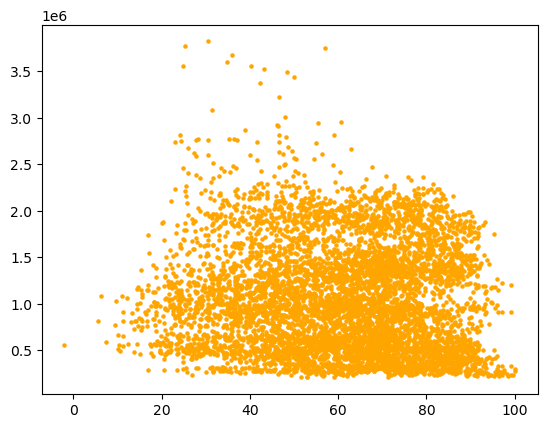

-0.06381001317946958


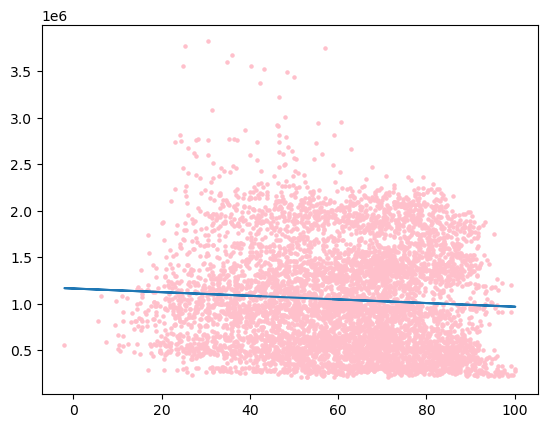

In [76]:
x = df['Temperature']
y = df['Weekly_Sales']
plt.scatter(x, y, c='orange', s=5)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y, c='pink', s=5)
plt.plot(x, mymodel)
plt.show()